### PART 1:

- Pulling Apple stock data for 2023
- Plotting the close prices over the year
- Print summary statistics of pulled data

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Fetch Apple stock data for 2023
stock = "AAPL"
data = yf.download(stock, start = "2023-01-01", end = "2023-12-31")

# Print the first few rows the see if it worked
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045036  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718987  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271088  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795593  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


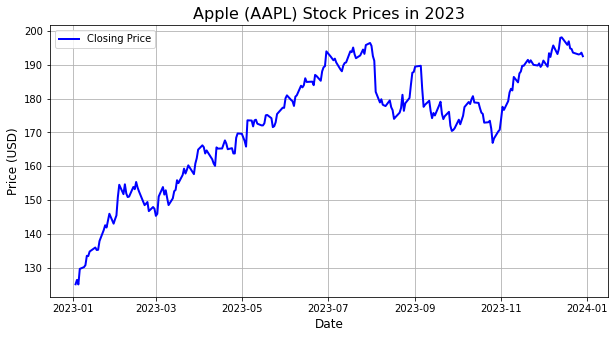

In [49]:
# Plotting the closing prices
fig = plt.figure(figsize=(10,5))
plt.plot(data["Close"], label="Closing Price", color="blue", linewidth=2)
plt.title("Apple (AAPL) Stock Prices in 2023", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [50]:
# Print summary stats
print("Summary statistics for Apple stock in 2023:")
print(data.describe())

Summary statistics for Apple stock in 2023:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   250.000000  250.000000  250.000000  250.000000  250.000000   
mean    171.281995  172.549000  173.857520  170.981880  172.256681   
std      17.418789   17.331672   17.261055   17.535099   17.530359   
min     123.718987  125.019997  127.769997  124.169998  126.010002   
25%     160.670422  162.112499  162.387501  160.699997  161.555000   
50%     174.389793  175.475006  177.025002  173.840004  175.244995   
75%     186.265347  187.330002  188.095001  185.174995  186.805000   
max     197.144180  198.110001  199.619995  197.000000  198.020004   

Price         Volume  
Ticker          AAPL  
count   2.500000e+02  
mean    5.921703e+07  
std     1.777392e+07  
min     2.404830e+07  
25%     4.781208e+07  
50%     5.507750e+07  
75%     6.574292e+07  
max     1.543573e+08  


In [51]:
# Save plot image
fig.savefig("Graphs/Apples_Stock_Graph.png")

---

### PART 2: 
- Compare Apple stock to another asset (Benchmarking)
- Add a Moving Average (Trend Analysis)
- Highlight Volatility (Risk Analysis)
- Create Dashboard (Presentation)

In [52]:
# Benchmark against the S&P 500 (^GSPC) 

# Fetch S&P 500 data
sp500 = yf.download("^GSPC", start = "2023-01-01", end = "2023-12-31")

# Print the first few rows to see if it worked
sp500.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2023-01-03,3824.139893,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
2023-01-04,3852.969971,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2023-01-05,3808.100098,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
2023-01-06,3895.080078,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
2023-01-09,3892.090088,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


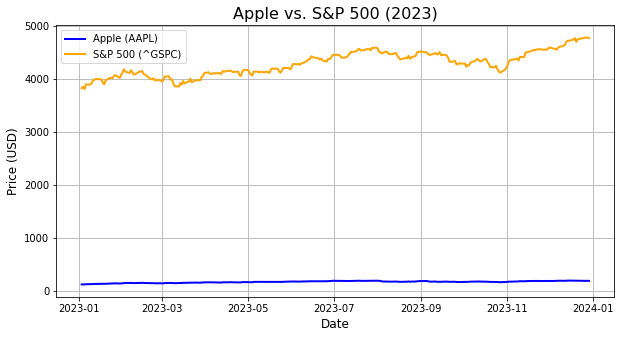

In [53]:
# Plot Apple vs. S&P 500
fig2 = plt.figure(figsize=(10,5))
plt.plot(data["Close"], label = "Apple (AAPL)", color = "blue", linewidth = 2)
plt.plot(sp500["Close"], label = "S&P 500 (^GSPC)", color = "orange", linewidth = 2)
plt.title("Apple vs. S&P 500 (2023)", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Price (USD)", fontsize = 12)
plt.legend()
plt.grid()
plt.show()

The two stocks are on wildly different scales, therefore I need to plot them on two y-axes so that each dataset gets its own scale, making the lines more visible and meaningful

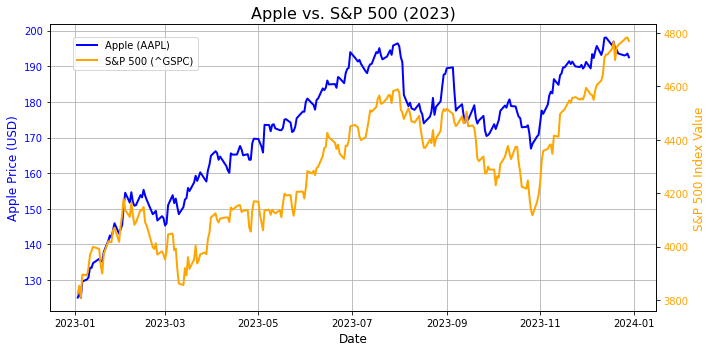

In [54]:
fig3, ax1 = plt.subplots(figsize=(10,5))

fig3.patch.set_facecolor("white")  # Ensures the whole figure background is white

# Plot Apple on the left y-axis
ax1.plot(data["Close"], label = "Apple (AAPL)", color = "blue", linewidth = 2)
ax1.set_ylabel("Apple Price (USD)", fontsize = 12, color = "blue")
ax1.tick_params(axis="y", labelcolor= "blue")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()
ax2.plot(sp500["Close"], label = "S&P 500 (^GSPC)", color = "orange", linewidth = 2)
ax2.set_ylabel("S&P 500 Index Value", fontsize = 12, color = "orange")
ax2.tick_params(axis="y", labelcolor = "orange")

# Add title and grid
plt.title("Apple vs. S&P 500 (2023)", fontsize = 16)
ax1.set_xlabel("Date", fontsize = 12)
ax1.grid()

fig3.tight_layout()

# Add legends
fig3.legend(loc = "upper left", bbox_to_anchor = (0.1, 0.9))

plt.show()

fig3.savefig("Graphs/Apple vs S&P 500 (2023).png")


Looking at the gradients, if Apple's line has a steeper upward gradient than the S&P 500 during a certain period, it means Apple's stock is growing faster than the market at that time

E.g: if Apple's line dips while the S&P 500 is steady or rising, it means Apple is underperforming relative to the market in that period 

From the graph above I notice that Apple's price stopped steadily rising from August 2023, and it suddenly becomes more volatile as seen from the bigger dips and rises. This is also the time period where the S&P 500 growth steadies, and begins to trend downwards. Visually, there is a difference in volatility during this period, which could indicate Apple's performance was more reactive to specific events, such as a product launch or earning reports.

---

In [55]:
# Calculate 30-day moving average
data["30-Day MA"] = data["Close"].rolling(window=30).mean()

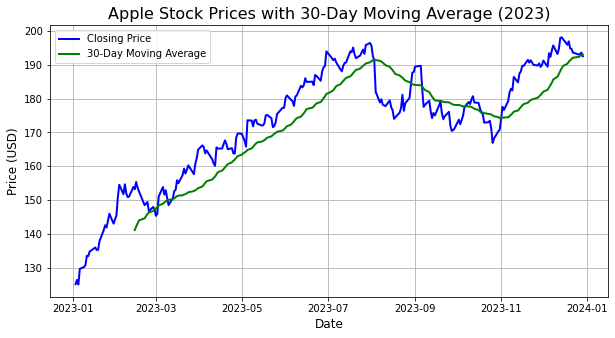

In [56]:
# Plot Closing Price and Moving Average
fig4 = plt.figure(figsize=(10,5))
plt.plot(data["Close"], label = "Closing Price", color = "blue", linewidth = 2)
plt.plot(data["30-Day MA"], label = "30-Day Moving Average", color = "green", linewidth = 2)
plt.title("Apple Stock Prices with 30-Day Moving Average (2023)", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Price (USD)", fontsize = 12)
plt.legend()
plt.grid()
plt.show()

fig4.savefig("Graphs/Apple Stock Prices with 30 Day Moving Average (2023)")

The graph above shows the 30-Day Moving Average, which essentially smooths out the Closing Price line by taking the average of the last 30 days of prices at each point, which is also why the green line doesn't being until 30 days into the year. It shows the overall trend in Apple's stock price while ignoring short-term fluctuations.

Simple insights include:

- The stock was generally on an upward trend from Jan to Aug 2023

- There was a downward trend from Aug to Nov

- The stock recovered strongly after Oct, showing another upward trend

- The daily closing prices show significant volatility, however the moving average green line helps isolate the overall market sentiment, which is crucial for long-term decision making

- Crosses in the two lines roughly indicate a potential trend change, e.g: when the blue line crossed below the green line around August, it is a Bearish signal indicating a downtrend.


---

In [57]:
# Calculating volatility

# Calculate the daily percentage change
data["Daily Change (%)"] = data["Close"].pct_change() * 100

# Calculate and print volatility
volatility = data["Daily Change (%)"].std()
print(f"Volatility (Standard Deviation of Daily Returns) is {volatility:.2f}%")

Volatility (Standard Deviation of Daily Returns) is 1.26%


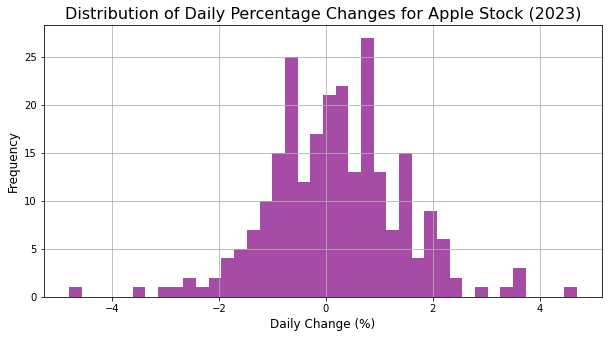

In [58]:
# Plotting a histogram of daily changes to visualise risk distribution

fig5 = plt.figure(figsize=(10,5))
plt.hist(data["Daily Change (%)"].dropna(), bins = 40, color = "purple", alpha = 0.7)
plt.title("Distribution of Daily Percentage Changes for Apple Stock (2023)", fontsize = 16)
plt.xlabel("Daily Change (%)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.grid()
plt.show()

fig5.savefig("Graphs/Distribution of Daily Percentage Changes for Apple Stock (2023)")

The distribution of daily percentage changes above looks relatively symmetrical, with the bulk of the bars centred around 0% on the x-axis, meaning most of the time, Apple's daily price changes were relatively small. Apple's daily price changes were mostly within the range of -2% and +2%, so it was realtively stable on an average day. Therefore the stock wasn't very volatile.

In [59]:
mean_change = data["Daily Change (%)"].mean()
median_change = data["Daily Change (%)"].median()
print(f"Mean: {mean_change:.4f}, Median: {median_change:.4f}")


Mean: 0.1812, Median: 0.1797


More accurately, the data is slightly shifted towards the positive side. The fact that the mean and median of the daily percentage changes are close in value, means the histogram isn't skewed.

In [60]:
from scipy.stats import skew

skewness = skew(data["Daily Change (%)"].dropna())
print(f"Skewness: {skewness:.4f}")


Skewness: 0.0130


The calculated "Skewness" of the data also suggests symmetry as the value is close to 0. Since it's a positive skew, more positive changes were observed (right tail is slighlty longer).

This approximate symmetry in the distribution if daily returns doesn't necessarily mean that Apple's stock didn't change much **overall**.

Even if the daily changes are symmetrical, a consistent small positive bias (e.g: slightly more days with +1% returns than -1%) can result in significant **cumulative growth** over time.

In [61]:
data["Cumulative Return"] = (1 + (data["Daily Change (%)"] / 100)).cumprod()
final_return = (data["Cumulative Return"].iloc[-1] - 1) * 100
print(f"Total Cumulative Return in 2023: {final_return:.2f}%")


Total Cumulative Return in 2023: 53.94%


---

In [62]:
# Flatten the MultiIndex into single-level column names
# Now can access "30-Day MA" directly
aligned_data = data.copy()
aligned_data.columns = [' '.join(col).strip() for col in data.columns.values]

In [63]:
sp500.index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [78]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=aligned_data.index,
    y=aligned_data["Close AAPL"],  # Adjusted for flattened columns
    mode="lines",
    name="Apple Close",
    line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=aligned_data.index,
    y=aligned_data["30-Day MA"], 
    mode="lines",
    name="30-Day MA",
    line=dict(color="red")
))
fig.add_trace(go.Scatter(
    x=sp500.index,
    y=sp500["Close"]["^GSPC"], 
    mode="lines",
    name="S&P 500 Close",
    line=dict(color="orange")
))



fig.update_layout(
    title="Apple Stock Dashboard (2023)",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    yaxis2=dict(
        title="S&P 500 Index Value",
        overlaying="y",
        side="right"
    ),     
    legend=dict(x=0, y=1),
    plot_bgcolor="white"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)


# Assign the S&P 500 line to y-axis2
fig['data'][2].update(yaxis='y2')

fig.show()


In [80]:
import plotly.express as px

# Create a DataFrame combining Apple and S&P 500 data
combined_data = aligned_data.copy()


# Create the line plot with Plotly Express
fig = px.line(
    combined_data,
    x=combined_data.index,
    y=["Close AAPL", "30-Day MA"],
    labels={
        "value": "Price (USD)",
        "variable": "Stock"
    },
    title="Apple Stock Dashboard (2023)"
)

fig.update_traces(dict(line=dict(width=2)))  # Adjust line width for all traces

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()
